### Practical Implementation on Weather Data

First we import the necessary libraries of the python for demostration of the Decision Tree Classifier

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score,auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Read the data of the weather from the csv file using read_csv function of pandas dataframe

In [4]:
data = pd.read_csv('C:\\Users\\LENOVO\\Desktop\\NLP code & Data Set\\daily_weather.csv')

The file **daily_weather.csv** is a comma-separated file that contains weather data.The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

Let's now check all the columns in the data

Know about various columns in the dataset.

In [5]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [6]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [7]:
data.shape

(1095, 11)

In [9]:
data.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1095.000000,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,547.000000,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,0.499543
std,316.243577,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,0.500228
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,0.000000
25%,273.500000,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,0.000000
50%,547.000000,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,0.000000
75%,820.500000,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,1.000000
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,1.000000


In [10]:
data[data.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,1
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,1
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,1
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,0
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,1


#### Data Cleaning Steps

Data Cleaning process --> As number column contains unique values which can not help us making any decision

In [11]:
del data['number']

Calculating the amount of data or say number of rows in the dataset before removing the rows containg null values

In [12]:
before_rows = data.shape[0]
print(before_rows)

1095


Removing the rows which contains the null values.

In [13]:
data = data.dropna()

Calculatoing the amount of data or say number of rows in the dataset after removing the rows containg null values

In [14]:
after_rows = data.shape[0]
print(after_rows)

1064


Calculate how many rows are deleted which contains the Null Values

In [15]:
before_rows - after_rows

31

### Use 9am Sensor Signals as Features to Predict Humidity at 3pm

Storing all the Morning features other than Humidity at 3 pm in the morning feature

In [17]:
morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
 'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
 'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

Copying the values from the clean_data dataset to new dataset x which only consist of the Morning Feature Data

In [18]:
x = data[morning_features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [19]:
y = data['relative_humidity_3pm']

#### Perform Test and Train split

By using train_test_split we have split the data into traing dataset and testing datasets.

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=324)

Fit on Train Set

We have made a classifier for making the Decision Tree and to train the data using this classifier

In [21]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [22]:
type(humidity_classifier)

sklearn.tree.tree.DecisionTreeClassifier

#### Predict on Test Set

Using humidity_classifier we have predicted the value for the X_test and stored it to y_predicted

In [23]:
y_predicted = humidity_classifier.predict(X_test)

In [24]:
y_predicted[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [25]:
y_test[:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: relative_humidity_3pm, dtype: int64

### Measure Accuracy of the Classifier

Checking our accuracy of the model using accuracy_score function from sklearn metrics which in this case is with around 90% accuracy"

In [26]:
accuracy_score(y_test,y_predicted)*100

90.05681818181817

### Decision Tree Hyperparameters

In [27]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [28]:
X_train.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,918.913897,65.194366,142.123330,5.568288,147.789373,7.089629,0.202399,282.884615,34.041941
std,3.147923,11.210412,68.773699,4.467828,67.186609,5.486311,1.628988,1584.404987,25.479034
min,907.990000,36.752000,15.500000,0.782929,31.800000,1.185578,0.000000,0.000000,6.090000
25%,916.727792,57.375500,65.282862,2.304048,75.978656,3.168182,0.000000,0.000000,15.356207
50%,919.000000,65.967556,166.225018,3.958486,176.800000,5.077854,0.000000,0.000000,23.169630
75%,921.134993,73.908500,190.500000,7.504934,201.400000,9.104346,0.000000,0.000000,44.430128
max,929.320000,91.112000,343.400000,21.541732,299.200000,26.351153,24.020000,17704.000000,92.410000


### Hyperparameters

Minimum samples for a node split - Sklearn Param : min_samples_split
Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.Too high values can lead to under-fitting hence, it should be tuned using CV

Minimum samples for a terminal node (leaf)- Sklearn Param : min_samples_leaf.Defines the minimum samples (or observations) required in a terminal node or leaf.Used to control over-fitting similar to min_samples_split.Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.

Maximum depth of tree (vertical depth)- Sklearn Param: max_depth.The maximum depth of a tree.Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.Should be tuned using CV.

Maximum number of terminal nodes - Sklearn Param : max_leaf_nodes.The maximum number of terminal nodes or leaves in a tree.Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.

Maximum features to consider for split - Skearln Param : max_features.The number of features to consider while searching for a best split. These will be randomly selected.As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.Higher values can lead to over-fitting but depends on case to case.

In [29]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10,min_impurity_decrease=0.0004,
random_state=0,max_depth=5,min_samples_split=200,min_samples_leaf=50)
humidity_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0004, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
#Plot tree
import graphviz
from sklearn.externals.six import StringIO
#from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ['PATH']=os.environ['PATH']+";"+"C:\\Users\\LENOVO\\Anaconda3\\Library\\bin\\graphviz"

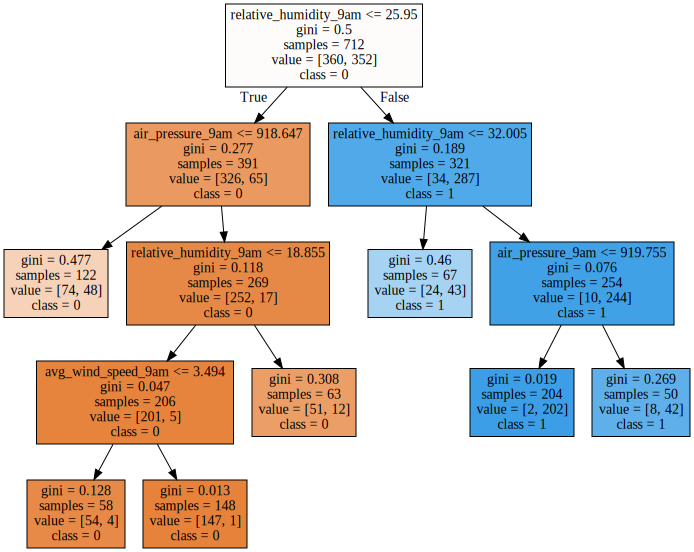

In [32]:
graph = Source(tree.export_graphviz(humidity_classifier, out_file=None, feature_names=X_train.columns, class_names=['0', '1'] 
  , filled = True))
display(SVG(graph.pipe(format='svg')))